In [105]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [106]:
data_train = pd.read_csv("train.csv")
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## preprocess

In [107]:
data_train = data_train.replace(["female", "male"], [0, 1])
data_train = data_train.replace(["S", "C", "Q"], [0, 1, 2])
data_train = data_train.fillna(0)
data_train.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,0.0
5,6,0,3,"Moran, Mr. James",1,0.0,0,0,330877,8.4583,0,2.0
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,0.0
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,0,0.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,0,0.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,0,1.0


In [108]:
avg_age = data_train["Age"].mean()
data_train["Age"] = data_train["Age"].replace([0], [int(avg_age)])

In [109]:
X_train = data_train[["Pclass", "Sex", "Age", "SibSp", "Parch"]].values
Y_train = data_train[["Survived"]].values

## MLP model

In [110]:
model = tf.keras.models.Sequential([
    Dense(5, activation="sigmoid"),
    Dense(64, activation="relu"),
    Dense(32, activation="sigmoid"),
    Dense(16, activation="relu"),
    Dense(8, activation="sigmoid"),
    Dense(4, activation="relu"),
    Dense(2, activation="softmax")
])

In [111]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss=tf.losses.sparse_categorical_crossentropy,
              metrics=["accuracy"])

In [112]:
# train
train_output = model.fit(X_train, Y_train, epochs=200)

Epoch 1/200
28/28 [==============================] - 0s 686us/step - loss: 0.6716 - accuracy: 0.6072
Epoch 2/200
28/28 [==============================] - 0s 667us/step - loss: 0.6672 - accuracy: 0.6162
Epoch 3/200
28/28 [==============================] - 0s 704us/step - loss: 0.6336 - accuracy: 0.6397
Epoch 4/200
28/28 [==============================] - 0s 686us/step - loss: 0.4996 - accuracy: 0.7901
Epoch 5/200
28/28 [==============================] - 0s 667us/step - loss: 0.4675 - accuracy: 0.8036
Epoch 6/200
28/28 [==============================] - 0s 686us/step - loss: 0.4475 - accuracy: 0.7980
Epoch 7/200
28/28 [==============================] - 0s 630us/step - loss: 0.4938 - accuracy: 0.7811
Epoch 8/200
28/28 [==============================] - 0s 686us/step - loss: 0.4625 - accuracy: 0.8070
Epoch 9/200
28/28 [==============================] - 0s 649us/step - loss: 0.4408 - accuracy: 0.8193
Epoch 10/200
28/28 [==============================] - 0s 649us/step - loss: 0.4304 - accura

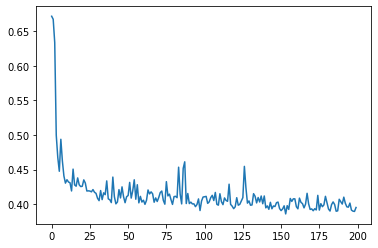

<function matplotlib.pyplot.show(close=None, block=None)>

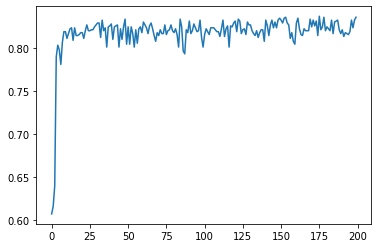

In [113]:
plt.plot(train_output.history["loss"])
plt.show()
plt.plot(train_output.history["accuracy"])
plt.show

## load test data

In [114]:
data_test = pd.read_csv("test.csv")
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## prepare test data

In [115]:
data_test = data_test.replace(["female", "male"], [0, 1])
data_test = data_test.replace(["S", "C", "Q"], [0, 1, 2])
data_test = data_test.fillna(0)
avg_age = data_test["Age"].mean()
data_test["Age"] = data_test["Age"].replace([0], [int(avg_age)])

In [116]:
X_test = data_test[["Pclass", "Sex", "Age", "SibSp", "Parch"]].values

In [117]:
data_test_y = pd.read_csv("gender_submission.csv")
Y_test = data_test_y[["Survived"]].values

## predict

In [118]:
Y_pred = model.predict(X_test)
Y_pred = np.argmax(Y_pred, axis=1)
Y_pred = Y_pred.reshape(-1, 1)
Y_pred.shape

(418, 1)

In [132]:
jack = np.array([[1, 1, 36, 0, 0]])

result = model.predict(jack)
np.argmax(result)

1

## evaluate

In [119]:
evaluate_output = model.evaluate(X_test, Y_test)
MLP_accuracy = evaluate_output[1]

14/14 [==============================] - 0s 539us/step - loss: 0.3734 - accuracy: 0.8565


## Save train file

In [131]:
model.save("my_titanic.h5")

## KNN (K Nearest Neighbors)

In [120]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [121]:
my_knn = KNeighborsClassifier(n_neighbors=3)
Y_train_flatten = Y_train.flatten()
my_knn.fit(X_train, Y_train_flatten)

KNeighborsClassifier(n_neighbors=3)

In [122]:
Y_pred = my_knn.predict(X_test)

In [123]:
Y_test_flatten = Y_test.flatten()
knn_accuracy = accuracy_score(Y_test_flatten, Y_pred)

In [124]:
print("KNN Accuracy:", knn_accuracy)

KNN Accuracy: 0.8038277511961722


## Perceptron

In [125]:
class Perceptron:
    def __init__(self, lr_w, lr_b, epochs):
        # hyper params
        self.lr_w = lr_w
        self.lr_b = lr_b
        self.epochs = epochs
        self.w = np.random.rand(1, 5)
        self.b = np.random.rand(1, 1)
    
    # Train
    def fit(self, X_train, Y_train):
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(15, 6)
        Errors_train = []
        Errors_test = []
        w_list = []
        b_list = []
        N = X_train.shape[0]
        
        for epoch in range(self.epochs):
            for i in range(N):
                x = X_train[i]
                y = Y_train[i]
                
                y_pred = np.matmul(x, self.w.T) + self.b
                e = y - y_pred
                
                # update
                self.w += self.lr_w * e * x
                self.b += self.lr_b * e
                w_list.append(self.w)
                b_list.append(self.b)

            # visualization
            Y_pred = X_train * self.w + self.b
             
            Error_train = np.mean(np.abs(Y_train - Y_pred)) # MAE
            Errors_train.append(Error_train)
            ax1.clear()
            ax1.set_title("MAE Loss (Train)")
            ax1.plot(Errors_train)
            
            Y_pred = X_test * self.w + self.b
            Error_test = np.mean(np.abs(Y_test - Y_pred)) # MAE
            Errors_test.append(Error_test)
            ax2.clear()
            ax2.set_title("MAE Loss (Test)")
            ax2.plot(Errors_test)
            
        plt.show()
        
    def evaluate(self, X_test, Y_true, loss="MAE"):
        Y_pred = self.predict(X_test)
        if loss == "MAE":
            Error_test = np.mean(np.abs(Y_true - Y_pred))
            return f"MAE Loss for X_test: {Error_test}"
        elif loss == "MSE":
            Error_test = np.mean((Y_true - Y_pred) ** 2)
            return f"MSE Loss for X_test: {Error_test}"
    
    def predict(self, x_test):
        y_pred = np.matmul(x_test, self.w.T) + self.b
        y_pred = np.where(y_pred < 0.5, 0, 1)
        return y_pred

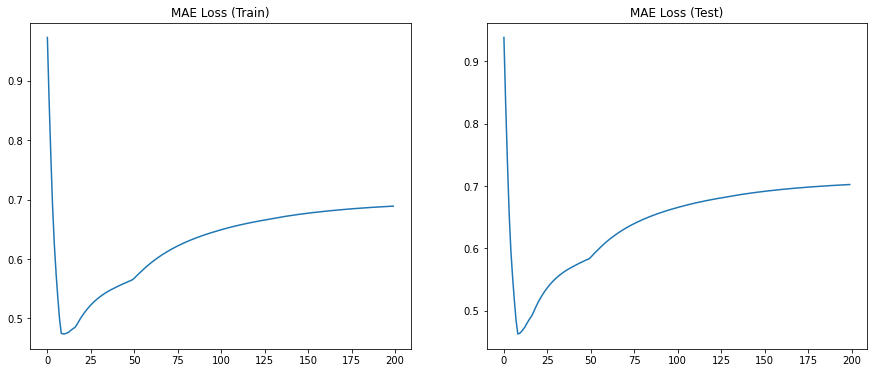

In [126]:
perceptron = Perceptron(lr_w=0.0001, lr_b=0.1, epochs=200)
perceptron.fit(X_train, Y_train)

In [127]:
print(perceptron.evaluate(X_test, Y_test, loss="MAE"))
print(perceptron.evaluate(X_test, Y_test, loss="MSE"))

MAE Loss for X_test: 0.07416267942583732
MSE Loss for X_test: 0.07416267942583732


In [128]:
Y_pred = perceptron.predict(X_test)
Y_pred[:10]

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0]])

In [129]:
perceptron_accuracy = r2_score(Y_test, Y_pred)
perceptron_accuracy

0.6795112781954887

## Compare accuracy

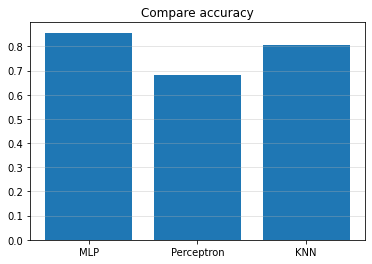

In [130]:
labels = ["MLP", "Perceptron", "KNN"]
height = [MLP_accuracy, perceptron_accuracy, knn_accuracy]
plt.bar(labels, height)
plt.grid(axis="y", alpha=0.4)
plt.title("Compare accuracy")
plt.show()